In [ ]:


# defines the 2SAT instance
#v = np.array([
  #[1, -1, -1, 1],
  #[-1, 1, -1, 0],
  #[0, 0, 0, 1],
#])



#response = dimod.ExactSolver().sample_ising(h, J)

#print(response.first)
#print(response.info)
#print(response.record)
#print(response.variables)
#print(response.vartype)

#print(response.aggregate())
#print(response.lowest())
#print(response.done())

In [161]:
from collections import defaultdict
import dwave.inspector
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import numpy as np
import dimod
import matplotlib.pyplot as plt

In [162]:
def generate_k_sat(k, n_vars, n_clauses):
    v = np.zeros((n_vars, n_clauses))
    for i in range(n_clauses):
        l = list(range(n_vars))
        sel = np.random.choice(l, size=k, replace=False)
        b = np.random.choice([-1, +1], size=k, replace=True)
        v[sel, i] = b
    return v

In [179]:
#alphas = [3, 3.5, 4, 4.5, 5, 5.5, 6]
alphas = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]

def perform_experiment(alphas):
    n_alphas = len(alphas)
    n_instances = 500
    n_vars = 10
    n_runs = 100
    responses = np.empty((n_alphas, n_instances), dtype=dimod.SampleSet)
    satisfiables = np.empty((n_alphas, n_instances), dtype=bool)
    acb_fractions = np.empty((n_alphas, n_instances), dtype=float)
    for alpha_i, alpha in enumerate(alphas):
        for instance in range(n_instances):
            v = generate_k_sat(3, n_vars, int(n_vars * alpha))
            h = defaultdict(int)
            J = defaultdict(int)

            for (j, occs) in enumerate(v):
              h[j] = - np.sum(occs)

            #n_vars = len(v)
            for i in range(n_vars):
              for j in range(n_vars):
                if i < j:
                  J[(i, j)] = np.sum(v[i] * v[j])

            max_coupler = max(np.abs(np.array(list(J.values()))))
            
            relative_chain_strength = 1.3
            chain_strength = max_coupler * relative_chain_strength

            #sampler = EmbeddingComposite(DWaveSampler())
            #response = sampler.sample_ising(
            #  h,
            #  J,
            #  chain_strength=chain_strength,
            #  num_reads=n_runs,
            #  label=f'3-SAT phase transition (experiment)',
            #)
            
            response = dimod.ExactSolver().sample_ising(h, J)
            
            solution = np.array(list(response.first.sample.values()))
            boolean_expressions = v * solution[:, np.newaxis]
            boolean_clauses = np.any(boolean_expressions == 1, axis=0)
            all_clauses_fulfilled = np.all(boolean_clauses)
            
            #average_chain_break_fraction = np.mean(response.record.chain_break_fraction)
            average_chain_break_fraction = float(np.sum(boolean_clauses)) / len(boolean_clauses)
            
            responses[alpha_i, instance] = response
            satisfiables[alpha_i, instance] = all_clauses_fulfilled
            acb_fractions[alpha_i, instance] = average_chain_break_fraction
    
    return responses, satisfiables, acb_fractions

responses, satisfiables, acb_fractions = perform_experiment(alphas)

acb_fractions_averaged = np.mean(acb_fractions, axis=1)

plt.figure()
plt.plot(alphas, acb_fractions_averaged)
plt.show()

plt.figure()
plt.plot(alphas, np.sum(satisfiables, axis=1) / satisfiables.shape[1])
plt.show()

KeyboardInterrupt: 

In [150]:
v = generate_k_sat(3, 25, 75)

In [151]:
print(f'alpha = {round(v.shape[1] / v.shape[0], 2)}')

# verifies that only 2-clauses exist!
for x in np.sum(np.abs(v), axis=0):
  if x != 3:
    print("expression may only contain 3-clauses")
    raise Exception

alpha = 3.0


In [152]:
h = defaultdict(int)
J = defaultdict(int)

for (j, occs) in enumerate(v):
  h[j] = - np.sum(occs)

n_vars = len(v)
for i in range(n_vars):
  for j in range(n_vars):
    if i < j:
      J[(i, j)] = np.sum(v[i] * v[j])

max_coupler = max(np.abs(np.array(list(J.values()))))
max_coupler

3.0

[12 10  8  9 14 11 17 12 12 10  8 13  7 11 10 12  6  8  9  6 17 10 13 10
 13]
10.72


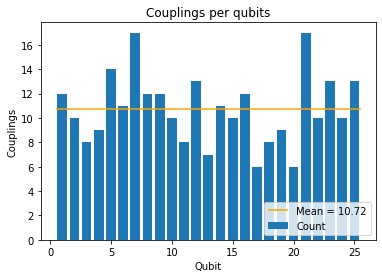

(array([12, 10,  8,  9, 14, 11, 17, 12, 12, 10,  8, 13,  7, 11, 10, 12,  6,
         8,  9,  6, 17, 10, 13, 10, 13], dtype=int16),
 10.72)

In [153]:
ac_ising(h, J)

In [154]:

relative_chain_strength = 1.3
chain_strength = max_coupler * relative_chain_strength
print(f'chain_strength: {chain_strength}')
n_runs = 10

sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_ising(
  h,
  J,
  chain_strength=chain_strength,
  num_reads=n_runs,
  label=f'3-SAT phase transition',
)
#response = dimod.ExactSolver().sample_ising(h, J)
print(response)
dwave.inspector.show(response)

chain_strength: 3.9000000000000004
   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 ... 24 energy num_oc. ...
0 -1 +1 +1 -1 -1 -1 +1 -1 +1 -1 +1 +1 -1 -1 +1 -1 +1 ... +1  -76.0       1 ...
2 -1 -1 -1 -1 -1 -1 +1 +1 +1 +1 +1 +1 -1 -1 -1 -1 +1 ... -1  -74.0       1 ...
1 -1 -1 -1 +1 +1 -1 +1 +1 -1 +1 +1 -1 -1 +1 -1 -1 -1 ... -1  -72.0       1 ...
3 -1 -1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 -1 -1 -1 -1 -1 ... -1  -72.0       1 ...
4 -1 -1 -1 +1 +1 -1 +1 +1 -1 +1 +1 -1 -1 +1 -1 -1 +1 ... -1  -70.0       3 ...
5 -1 -1 -1 +1 +1 -1 +1 +1 -1 +1 +1 -1 -1 +1 -1 -1 +1 ... -1  -66.0       1 ...
6 -1 -1 +1 -1 +1 -1 +1 +1 -1 +1 -1 -1 -1 +1 +1 -1 +1 ... -1  -58.0       1 ...
7 -1 -1 +1 -1 +1 -1 +1 +1 -1 +1 -1 -1 -1 +1 -1 -1 +1 ... -1  -58.0       1 ...
['SPIN', 8 rows, 10 samples, 25 variables]


'http://127.0.0.1:18000/?problemId=12687871-7358-410c-b26a-de324c4d37ab'

In [155]:
solution = np.array(list(response.first.sample.values()))
boolean_expressions = v * solution[:, np.newaxis]
boolean_clauses = np.any(boolean_expressions == 1, axis=0)
all_clauses_fulfilled = np.all(boolean_clauses)
all_clauses_fulfilled

False

In [156]:
boolean_clauses

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [157]:
np.mean(response.record.chain_break_fraction)

0.034999999999999996

In [101]:
response.to_serializable()

{'type': 'SampleSet',
 'version': {'sampleset_schema': '3.1.0'},
 'num_variables': 25,
 'num_rows': 10,
 'sample_data': {'type': 'array',
  'data': [[10457916],
   [14095284],
   [10457916],
   [15305062],
   [11114870],
   [14095156],
   [12294004],
   [11867254],
   [12162942],
   [14095284]],
  'data_type': 'uint32',
  'shape': (10, 1),
  'use_bytes': False},
 'sample_type': 'int8',
 'sample_packed': True,
 'vectors': {'energy': {'type': 'array',
   'data': [-220.0,
    -206.0,
    -220.0,
    -226.0,
    -224.0,
    -206.0,
    -216.0,
    -196.0,
    -186.0,
    -206.0],
   'data_type': 'float64',
   'shape': (10,),
   'use_bytes': False},
  'num_occurrences': {'type': 'array',
   'data': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
   'data_type': 'int32',
   'shape': (10,),
   'use_bytes': False},
  'chain_break_fraction': {'type': 'array',
   'data': [0.08, 0.04, 0.08, 0.0, 0.0, 0.04, 0.0, 0.04, 0.08, 0.08],
   'data_type': 'float64',
   'shape': (10,),
   'use_bytes': False}},
 'variable_l

In [43]:
def ac_ising(h, J, verbose=True):

  _ = h

  s = set()

  for x in J:
    s.update(set(x))

  n_vars = max(s) + 1

  n_couplings = np.zeros((n_vars, ), dtype=np.int16)

  for x in J:
    if J[x] != 0:
      n_couplings[x[0]] += 1
      n_couplings[x[1]] += 1
  
  mean_couplings = np.mean(n_couplings)

  if verbose:
    print(n_couplings)
    print(mean_couplings)

    plt.figure()
    plt.title('Couplings per qubits')
    plt.xlabel('Qubit')
    plt.ylabel('Couplings')
    plt.bar(np.array(range(n_vars)) + 1, n_couplings, label='Count')
    plt.hlines([mean_couplings], 0.5, n_vars + 0.5, color='orange', label=f'Mean = {round(mean_couplings, 2)}')
    plt.legend(loc='lower right')
    plt.show()

  return n_couplings, mean_couplings


In [180]:
#3
#3.5
#4
#4.5
#5
#5.5
#6
#
#7 trials
#
#10 random problem instances each
#100 runs each
#
#16 ms for each 10 sample batch
#* 700
#
#~= 11.2 seconds
#
#(about a 6th of my monthly processing time)